Name: saiful islam  Id:170104146

***Import Drive ***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***import library***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

***Read the Train_knn  file***

In [13]:
training_data = pd.read_csv('/content/drive/MyDrive/pattern lab/train_knn.txt', sep=",",header=None)
training_data=training_data.to_numpy()


***If the class value is 1 then store it in class 1 else class 2***

In [14]:
class1=[[x[0],x[1]] for x in training_data if x[2]==1]
class2=[[x[0],x[1]] for x in training_data if x[2]==2]
class1 = np.array(class1)
class2 = np.array(class2)


***plot the points with different colored***

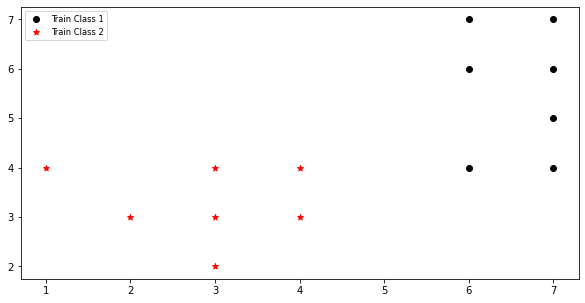

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.scatter(class1[:,0],class1[:,1],marker='o',color='k',label='Train Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='*',color='r',label='Train Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

Read the Test_knn file

In [17]:
testing_data = pd.read_csv('/content/drive/MyDrive/pattern lab/test_knn.txt', sep=",",header=None)
testing_data=testing_data.to_numpy()

***Distance calculate***

In [18]:
distances = []
prediction_list = []
final_dis = []
k = int(input())  #value of K will be taken from user.
for i in testing_data:
    predicted = 5
    count1 = 0
    count2 = 0
    for j in training_data:
        dis = math.sqrt(((i[0] - j[0]) **2) + ((i[1] - j[1]) **2)) #Distance calculate
        distances.append([dis,j[2]])
    distances.sort(key = lambda x: x[0])
    for u in distances[:k]:
        if(u[1] == 1):
            count1 = count1 + 1
        else:
            count2 = count2 + 1
    if(count1 > count2):
        predicted = 1
    else:
        predicted = 2
    
    distances.insert(k,[i[0],i[1]])
    print(distances[:k])
    final_dis.append(distances[:k+1])
    
    prediction_list.append([i[0],i[1],predicted])
    distances = []

prediction_list

7
[[3.0, 1], [3.0, 2], [3.1622776601683795, 1], [3.1622776601683795, 2], [3.605551275463989, 2], [4.0, 1], [4.0, 2]]
[[0.0, 1], [1.0, 1], [1.0, 1], [1.4142135623730951, 1], [2.0, 1], [3.0, 1], [3.1622776601683795, 1]]
[[0.0, 2], [1.0, 2], [1.0, 2], [1.4142135623730951, 2], [1.4142135623730951, 2], [2.0, 2], [2.23606797749979, 1]]
[[4.123105625617661, 1], [4.123105625617661, 2], [4.123105625617661, 2], [4.47213595499958, 1], [4.47213595499958, 2], [5.0, 2], [5.0990195135927845, 1]]
[[1.0, 2], [1.4142135623730951, 2], [2.0, 2], [2.23606797749979, 2], [2.23606797749979, 2], [2.23606797749979, 2], [3.0, 2]]
[[1.4142135623730951, 2], [2.0, 2], [2.0, 2], [2.23606797749979, 2], [2.8284271247461903, 2], [3.1622776601683795, 2], [3.605551275463989, 2]]
[[2.23606797749979, 1], [2.8284271247461903, 1], [3.1622776601683795, 1], [3.605551275463989, 1], [4.0, 2], [4.123105625617661, 2], [4.242640687119285, 1]]
[[1.4142135623730951, 1], [2.23606797749979, 1], [2.23606797749979, 1], [3.162277660168379

[[3, 7, 2],
 [7, 7, 1],
 [4, 3, 2],
 [2, 8, 2],
 [3, 5, 2],
 [1, 2, 2],
 [4, 8, 1],
 [8, 3, 1],
 [8, 4, 1]]

***## Classify the test points with different colored markers according to the predicted class label.***


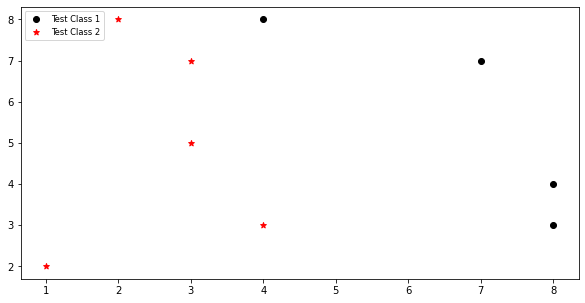

In [19]:
class1=[[x[0],x[1]] for x in prediction_list if x[2]==1]
class2=[[x[0],x[1]] for x in prediction_list if x[2]==2]
class1 = np.array(class1)
class2 = np.array(class2)

f, ax = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
ax.scatter(class1[:,0],class1[:,1],marker='o',color='k',label='Test Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='*',color='r',label='Test Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

***Print the top K distances and predicted class ***


In [29]:
prediction = open('/content/drive/MyDrive/pattern lab/prediction.txt','w')
for j in (final_dis):
    predicted = ''
    count1 = 0
    count2 = 0
    print(j[len(j)-1])
    stest = str(j[len(j)-1])+'\n'
    prediction.write(stest)
    n =1
    for u in j[:-1]:
        print('Distance calculate of closest point ',n,':',u[0],'\tClass',u[1],)                               #Print the top K distances
        sdis = 'Distance '+ str(n)+ ':'+ str( u[0] ) +'\tClass \n'+str(u[1])+'\n'
        prediction.write(sdis)
        if(u[1] == 1):
            count1 = count1 + 1
        else:
            count2 = count2 + 1
        n+=1
    if(count1 > count2):
        predicted = 'predicted Class 1'
    else:
        predicted = 'predicted Class 2'
    print('Predicted Class: ',predicted,'\n\n')                                     ##Print predicted class
    spredict = 'Predicted Class: '+str(predicted)+'\n'
    prediction.write(spredict)
prediction.close()

[3, 7]
Distance calculate of closest point  1 : 3.0 	Class 1
Distance calculate of closest point  2 : 3.0 	Class 2
Distance calculate of closest point  3 : 3.1622776601683795 	Class 1
Distance calculate of closest point  4 : 3.1622776601683795 	Class 2
Distance calculate of closest point  5 : 3.605551275463989 	Class 2
Distance calculate of closest point  6 : 4.0 	Class 1
Distance calculate of closest point  7 : 4.0 	Class 2
Predicted Class:  predicted Class 2 


[7, 7]
Distance calculate of closest point  1 : 0.0 	Class 1
Distance calculate of closest point  2 : 1.0 	Class 1
Distance calculate of closest point  3 : 1.0 	Class 1
Distance calculate of closest point  4 : 1.4142135623730951 	Class 1
Distance calculate of closest point  5 : 2.0 	Class 1
Distance calculate of closest point  6 : 3.0 	Class 1
Distance calculate of closest point  7 : 3.1622776601683795 	Class 1
Predicted Class:  predicted Class 1 


[4, 3]
Distance calculate of closest point  1 : 0.0 	Class 2
Distance calculat